1. Feature extraction for 30sc of song performed
2. Using this data, ML algos are implemented - kNN and Random Forest



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import csv

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix
from sklearn import preprocessing

In [ ]:
song_dir =os.listdir('/content/drive/My Drive/RP/genres')

In [ ]:
dataset_path ='/content/drive/My Drive/RP/Data.csv'

master_data = pd.read_csv(dataset_path) 
master_data.head()



,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,rolloff_max,rolloff_min,rolloff_mean,rolloff_std,rolloff_kurtosis,rolloff_skew,flux_max,flux_min,flux_mean,flux_std,flux_kurtosis,flux_skew,rmse_max,rmse_min,rmse_mean,rmse_std,rmse_kurtosis,rmse_skew,zcr_max,zcr_min,zcr_mean,zcr_std,zcr_kurtosis,zcr_skew,contrast_max,contrast_min,contrast_mean,contrast_std,contrast_kurtosis,contrast_skew,bandwidth_max,bandwidth_min,bandwidth_mean,bandwidth_std,...,mfcc_6_std,mfcc_6_kurtosis,mfcc_6_skew,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_7_kurtosis,mfcc_7_skew,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_8_kurtosis,mfcc_8_skew,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_9_kurtosis,mfcc_9_skew,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_10_kurtosis,mfcc_10_skew,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,genre
0,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,1253.915665,-0.589893,0.327106,12.954988,0.0,1.644384,1.958142,6.068005,2.287192,0.288393,0.007671,0.091563,0.047996,0.646815,0.849254,0.366211,0.039551,0.101500,0.044199,5.710074,1.939640,54.526649,6.113804,21.467739,7.938795,1.252378,1.244233,2770.695509,1081.656537,1748.362448,297.432368,...,9.658838,0.572860,-0.583507,33.730677,-27.954872,0.503117,11.168602,-0.228461,0.516213,24.094106,-44.258590,-11.805831,11.400602,-0.009328,-0.184066,30.684135,-24.465716,1.206804,9.987699,-0.303852,0.183510,24.979963,-41.409291,-13.083820,8.962364,1.803803,0.596276,31.721020,-30.323239,-2.806385,9.298361,0.430402,0.456069,24.070390,-36.607308,-6.934122,9.466887,0.057029,0.132279,blues
1,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,1222.395194,1.608416,1.245734,14.619909,0.0,1.247379,1.750351,12.675193,3.203631,0.383715,0.009310,0.141191,0.079617,-0.381391,0.525917,0.145020,0.006348,0.033309,0.020569,2.017897,1.072661,53.952526,5.438508,21.428764,7.962859,-0.023194,0.871523,3174.579278,671.098012,1596.333948,408.119547,...,12.491243,0.366743,-0.887007,30.783287,-18.335242,9.297965,9.008867,-0.251998,-0.328337,25.273713,-29.548192,-0.757741,9.601001,-0.467246,-0.325538,32.761795,-29.347543,8.149012,8.438341,1.682580,-0.656629,25.346260,-45.598267,-3.196314,10.502337,0.191071,-0.346805,40.363245,-14.122019,6.087676,6.942457,1.569782,0.613722,20.651334,-32.890564,-2.476420,7.538023,0.499351,-0.163374,blues
2,5444.293577,421.091729,1529.835316,613.175361,4.028086,1.339397,8085.717773,333.764648,3548.820207,1725.249654,-0.647548,0.447830,17.791127,0.0,1.444008,1.996799,12.743417,3.142622,0.271687,0.004361,0.095918,0.048718,-0.058206,0.299131,0.323730,0.006348,0.056044,0.038059,9.193445,2.362931,48.775996,5.534489,20.676334,8.239387,1.531287,1.428818,3402.554398,1046.389224,2038.617579,462.379133,...,14.177411,-0.036739,-0.257875,57.322294,-14.032229,23.358672,11.936523,-0.051591,0.107448,21.894634,-52.369707,-10.103616,12.894725,-0.527935,0.009104,40.404282,-29.546380,11.903744,10.219957,0.305566,-0.183417,24.502062,-37.257188,-5.560387,10.262492,0.172146,0.013335,37.242587,-25.349421,5.376802,9.812361,0.054883,0.154526,19.230036,-27.189579,-2.239119,8.055376,-0.182963,0.004210,blues
3,4499.417241,415.633570,1459.078483,661.885670,0.842177,0.967646,6761.425781,441.430664,2795.616429,1273.841376,0.133467,0.905289,16.464624,0.0,1.638620,2.383850,7.557786,2.620426,0.544812,0.002851,0.141796,0.093824,0.951191,0.969008,0.375488,0.017090,0.073028,0.043699,4.160115,1.379952,52.049604,5.271643,23.434488,7.035455,1.509991,0.936985,2682.510435,763.896690,1388.913312,430.296227,...,12.339140,0.584446,-0.145225,30.489766,-31.436108,0.270091,10.148165,-0.064685,0.240794,22.762749,-50.762742,-6.489760,11.446632,0.680415,-0.586795,33.897971,-54.016615,-5.517093,12.392673,1.727890,-0.460252,24.801148,-46.061145,-7.840328,9.354566,1.244

In [ ]:
master_data.shape

(1000, 133)

In [ ]:

y = master_data['genre']
X = master_data.drop(columns=['genre'])

In [ ]:
#scaling data

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))

In [ ]:
#x_scaled.head()

In [ ]:
#encode the genres:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [ ]:
#y_enc
#genre_list.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.25)

In [ ]:
len(y_train)

750

In [ ]:
len(y_test)

250

In [ ]:
def checkmodel(model, title = "Default"):
  model.fit(x_train, y_train)
  pred = model.predict(x_test)  # unlabeled observations , returns predicted labels y
  pred1 = model.predict(x_train)
  #print(confusion_matrix(y_test, pred)) #truth vs prediction
  print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
  print('Train Set Accuracy =  {0:.2f}'.format(accuracy_score(y_train, pred1)))
  print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
  # Confusion Matrix
  confmatrix = confusion_matrix(y_test, pred) 
  plt.figure(figsize = (10, 5))
  sns.heatmap(confmatrix, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
  plt.ylabel('truth')
  plt.xlabel('predicted')
  


Test Set Accuracy =  0.71
Train Set Accuracy =  0.79
Test Set F-score =  0.70


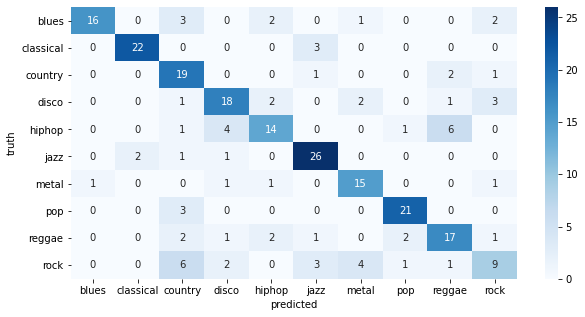

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=7)
checkmodel(knn, "KNN")


Minimum error:- 0.268 at K = 7


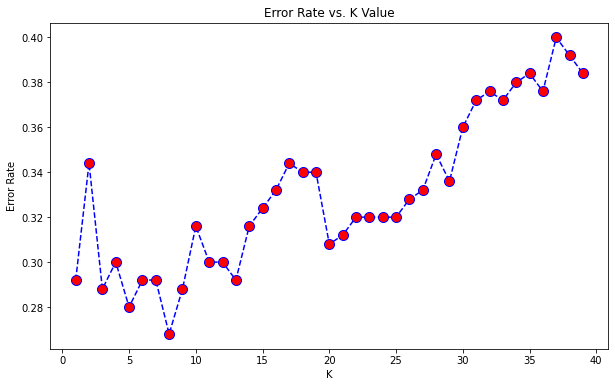

In [ ]:
#to check optimal value of k : plotting k vs error graph

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.732 at K = 7


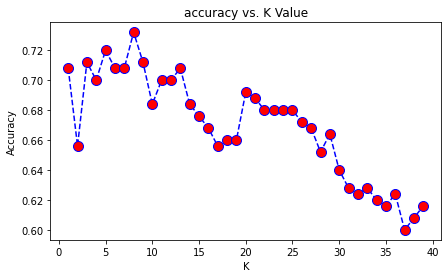

In [ ]:
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(7,4))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Test Set Accuracy =  0.78
Train Set Accuracy =  1.00
Test Set F-score =  0.78


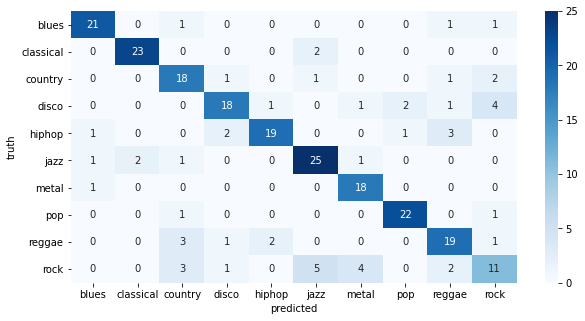

In [ ]:

randomforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=10) #10random trees
checkmodel(randomforest,  "Random Forest Classifier")
#randomforest.score(x_test,y_test)  #model accuracy

